<a href="https://colab.research.google.com/github/leejae7124/ProjectMountain/blob/master/SuminLee/Project4/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.프로젝트 개요
**Project 4: 두피 데이터 분석 시스템**
1. 두피측정 빅데이터를 이용한 자동진단 및 제품 추천 시스템
2. 필요 기술 스택: Python, Python Library(Pillow, Opencv), Deep Learning + Docker file

3. 프로세스
- json 데이터를 분석하여 증상별 상관관계를 찾는다.
- 분석한 결과를 토대로 증상에 맞게 제품을 추천한다.

# 2.일자별 진행 상황
1월 16일 작업 계획

1) 도커 공부: 이미지와 컨테이너의 개념
- image: container의 기본 레시피. 도커 파일을 빌드해서 만들 수 있다.
- container: image로 만든 인스턴스


2) 데이터 이해하기
- 데이터셋 다운로드 및 확인
- 무엇을 할 것인지 생각하기 (모델링 방향) => *일단 미세각질 이미지만 단계별 분류*

1월 17일

1) 무엇을 할 것인지 생각하기
- json 데이터를 분석하여 증상별 상관관계를 찾는다.
- 분석한 결과가 맞는지 증명한다. (이론 등을 이용)
- 증상에 맞게 제품을 추천한다. 이를 위해선 제품에 대한 조사가 필요하다.

2) 미세각질, 탈모 데이터 분석
- 시각화
- 상관관계 분석


# 3.1 데이터 분석 (미세각질)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#라이브러리
from PIL import Image
import os
import json
import pandas as pd
from pandas import json_normalize

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_미세각질_0
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]미세각질_0.양호.zip'

In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_미세각질_1
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]미세각질_1.경증.zip'

/content/drive/MyDrive/Project4/Dataset/라벨_미세각질_1


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_미세각질_2
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]미세각질_2.중등도.zip'

/content/drive/MyDrive/Project4/Dataset/라벨_미세각질_2


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_미세각질_3
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]미세각질_3.중증.zip'

/content/drive/MyDrive/Project4/Dataset/라벨_미세각질_3


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/원천_미세각질_0
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[원천]미세각질_0.양호.zip'

/content/drive/MyDrive/Project4/Dataset/원천_미세각질_0


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/원천_미세각질_1
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[원천]미세각질_1.경증.zip'

/content/drive/MyDrive/Project4/Dataset/원천_미세각질_1


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/원천_미세각질_2
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[원천]미세각질_2.중등도.zip'

/content/drive/MyDrive/Project4/Dataset/원천_미세각질_2


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/원천_미세각질_3
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[원천]미세각질_3.중증.zip'

/content/drive/MyDrive/Project4/Dataset/원천_미세각질_3


In [3]:
li_1 = ["라벨_미세각질_0", "라벨_미세각질_1", "라벨_미세각질_2", "라벨_미세각질_3"]

In [4]:
def openJson(li):
  df = pd.DataFrame({'image_id':[], 'image_file_name':[], 'value_1':[],'value_2':[],'value_3':[],'value_4':[], 'value_5':[],'value_6':[]})

  for folder in li:

    path_jsons = "/content/drive/MyDrive/Project4/Dataset/"+folder+"/"
    print(path_jsons)

    json_list = (os.listdir(path_jsons)) #json 파일명 다 담기
    print(len(json_list))

    for i in range(1, len(json_list)):
      example_file = open(path_jsons+json_list[i])
      json_file = json.load(example_file)
      df2 = pd.DataFrame.from_dict(json_file, orient="index")
      df2 = df2.transpose()
      df = pd.concat([df,df2], ignore_index = True)

  return df

In [5]:
df_1 = openJson(li_1)

/content/drive/MyDrive/Project4/Dataset/라벨_미세각질_0/
152
/content/drive/MyDrive/Project4/Dataset/라벨_미세각질_1/
1267
/content/drive/MyDrive/Project4/Dataset/라벨_미세각질_2/
1568
/content/drive/MyDrive/Project4/Dataset/라벨_미세각질_3/
652


In [6]:
df_1

,image_id,image_file_name,value_1,value_2,value_3,value_4,value_5,value_6
0,7978_A2LEBJJDE00071B_1606728948115_4,7978_A2LEBJJDE00071B_1606728948115_4_LH.jpg,0,0,0,0,0,0
1,9414_A2LEBJJDE00033L_1605521474634_2,9414_A2LEBJJDE00033L_1605521474634_2_TH.jpg,0,0,0,0,0,0
2,7670_A1LCAIHDH000126_1609648809001_6,7670_A1LCAIHDH000126_1609648809001_6_BH.jpg,0,0,0,0,0,0
3,8262_A2LEBJJDE00047M_1602749232911_3,8262_A2LEBJJDE00047M_1602749232911_3_TH.jpg,0,0,0,0,0,0
4,9400_A2LEBJJDE00078W_1603685063398_2,9400_A2LEBJJDE00078W_1603685063398_2_TH.jpg,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3630,1069_A2LEBJJDE00094D_1607579389669_6,1069_A2LEBJJDE00094D_1607579389669_6_BH.jpg,3,0,0,0,3,0
3631,8146_A2LEBJJDE00148A_1607650916866_6,8146_A2LEBJJDE00148A_1607650916866_6_BH.jpg,3,0,0,0,3,0
3632,4970_A1LCAIHDH00010K_1608001420956_2,4970_A1LCAIHDH00010K_1608001420956_2_TH.jpg,3,0,0,0,0,0
3633,2278_A2LEBJJDE00181Z_1606653240159_2,2278_A2LEBJJDE00181Z_1606653240159_2_TH.jpg,3,0,1,0,0,0


***value_1***: 미세각질(0,1,2,3 중 1개 값)

***value_2***: 피지과다(0,1,2,3 중 1개 값)

***value_3***: 모낭사이홍반(0,1,2,3 중 1개 값)

***value_4***: 모낭홍반/농포(0,1,2,3 중 1개 값)

***value_5***: 비듬(0,1,2,3 중 1개 값)

***value_6***: 탈모(0,1,2,3 중 1개 값)

## 3.1.1 시각화

In [7]:
# 그래프 x축 정렬을 위해 int 타입으로 변환
df_1 = df_1.astype({'value_1':'int','value_2':'int', 'value_3':'int', 'value_4':'int', 'value_5':'int', 'value_6':'int'})

In [8]:
df_1.dtypes

image_id           object
image_file_name    object
value_1             int64
value_2             int64
value_3             int64
value_4             int64
value_5             int64
value_6             int64
dtype: object

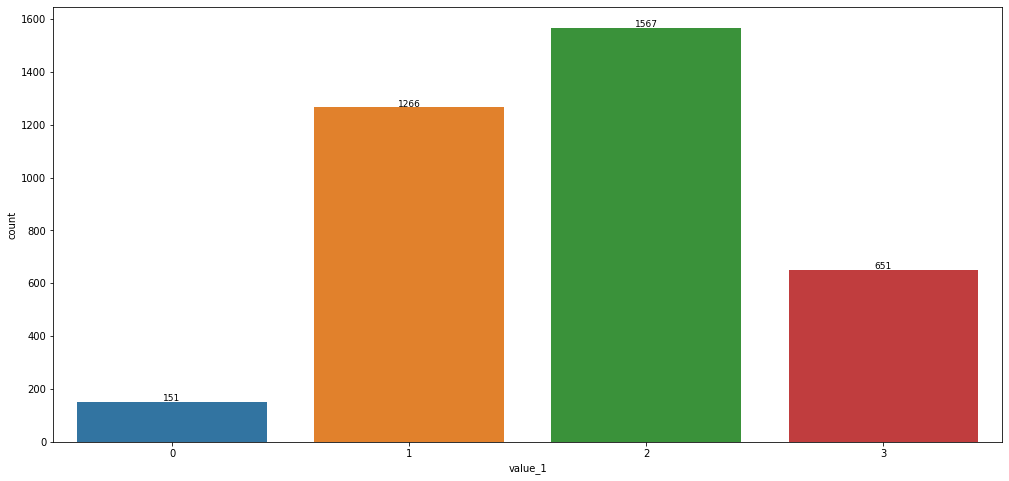

In [9]:
#미세각질 데이터 분포
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_1', data=df_1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

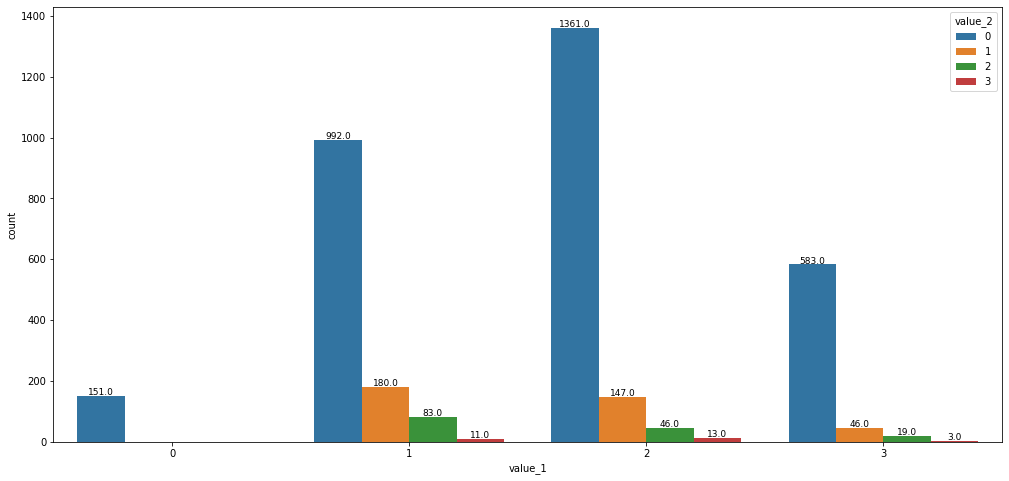

In [10]:
# 피지과다
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_1', data=df_1.sort_values(by = 'value_2'), hue='value_2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

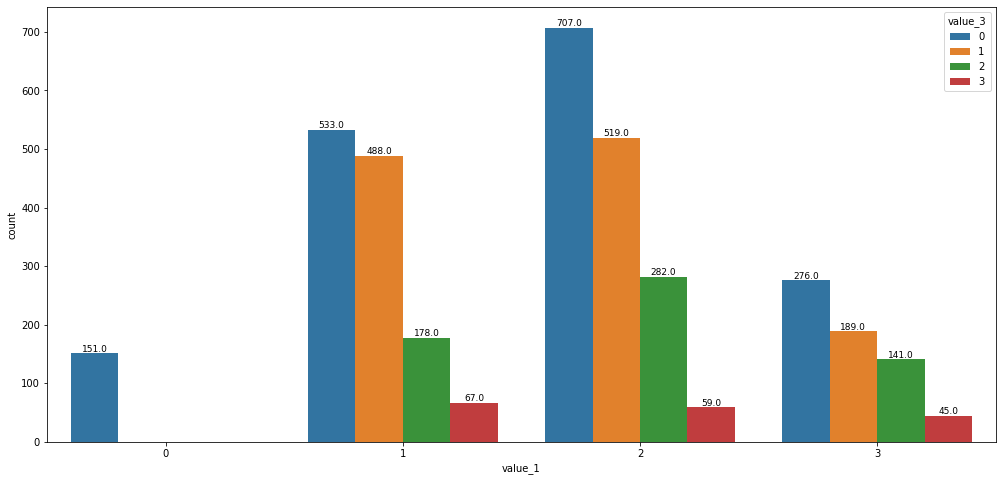

In [11]:
# 모낭사이홍반
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_1', data=df_1.sort_values(by = 'value_3'), hue='value_3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

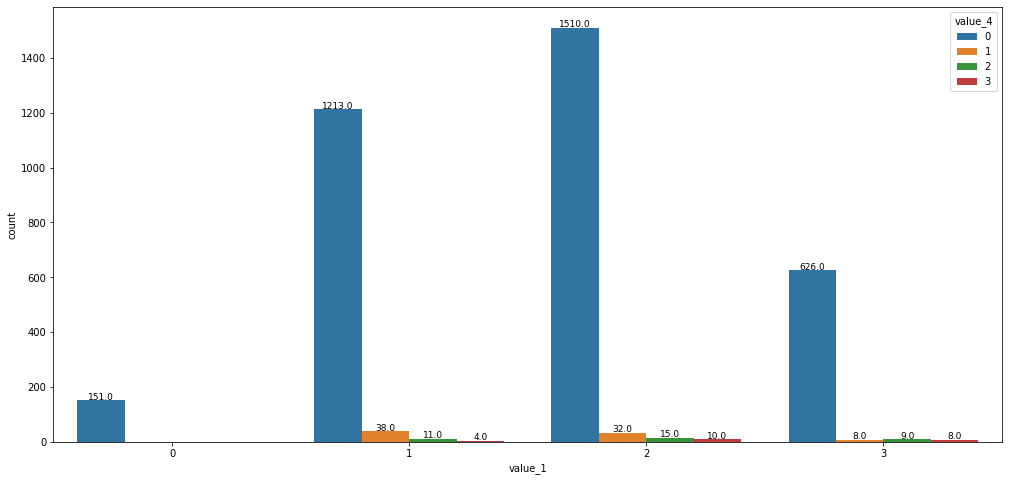

In [12]:
# 모낭홍반/농포
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_1', data=df_1.sort_values(by = 'value_4'), hue='value_4')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

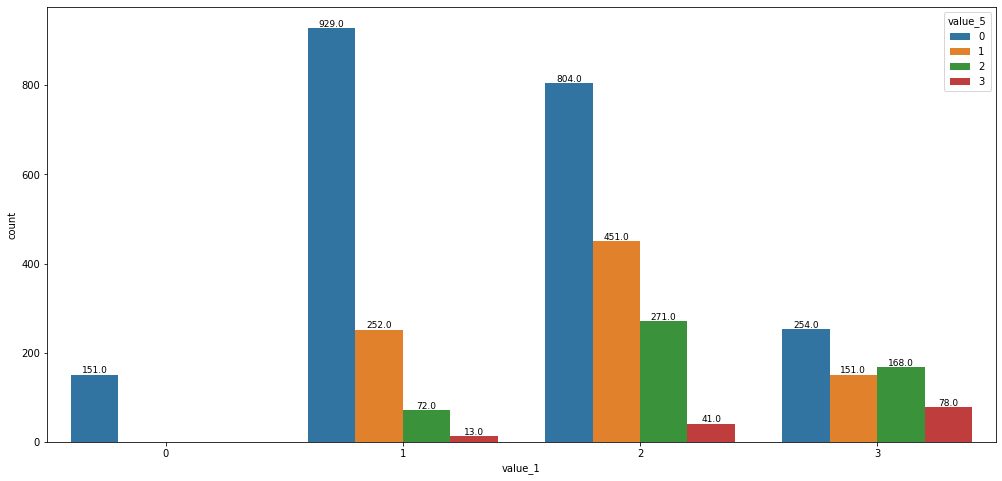

In [13]:
# 비듬
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_1', data=df_1.sort_values(by = 'value_5'), hue='value_5')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

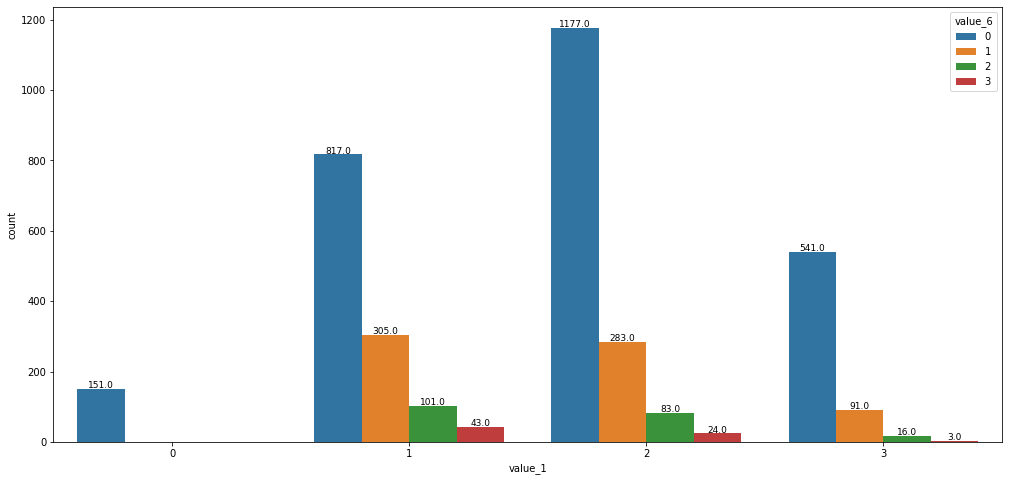

In [14]:
# 탈모
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_1', data=df_1.sort_values(by = 'value_6'), hue='value_6')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

count plot을 확인해본 결과,

- value 2, 4 (피지과다, 모낭홍반/농포)는 미세각질 강도가 증가하여도 눈에 띄게 강도 0 값이 많은 것을 확인하였다.
- ***가설 1: 미세각질과 피지과다/모낭홍반/농포는 동반되는 경우가 드물다.***

- value 3 (모낭사이홍반)은 미세각질 강도가 증가함에 따라 강도 1, 2, 3을 합한 값이 0보다 확연히 많다. 증상이 있는 경우가 많다.
- ***가설 2: 미세각질, 모낭사이홍반 증상은 함께 동반되는 경우가 많다.***



=> 다른 데이터도 이러한 방법으로 확인할 수 있다.

=> 제품을 추천할 때 유용할 것이다.

***미세각질***
- 두피표면의 천연보습인자(NMF) 부족과 피지선 기능이 저하되어 조기 박리증 증상을 보인다.
- 잔 각질이 관찰되며 모공 주변으로 나이테 모양의 각질층을 형성한다.
- 유수분의 부족으로 당김현상이나 가려움증을 호소한다.

***피지과다***
- 피지분비 과다로 두피 표면이 번들거리고 두피색은 탁하다.
- 심한 경우 피지산화 및 세균으로 인한 악취, 떡비듬, 지루성염증을 동반하기도 한다.

***모낭홍반/농포***
- 두피가 붉은 색을 띠며 표면에 홍반이 확인되는 경우가 있다.
- 세균감염으로 인한 염증이 있다.

***모낭사이홍반***
- 두피에 모세혈관 확장으로 인하여 홍반이나 출혈이 보인다.
- 태양열이나 에어컨바람과 같은 약한 자극에도 두피가 쉽게 붉어지고 통증이 있을 수 있다.


**미세각질 증상의 고객에게 제품을 추천한다면?**
- 건성 두피용 (유수분 부족 해결)
- 두피 염증은 크게 고려하지 않아도 된다.
- 약한 자극에도 통증이 있기 때문에 민감성 제품 추천





## 3.1.2 상관관계 분석
***스피어만 상관 계수***
- 스피어만 상관 계수는 두 데이터의 실제 값 대신 두 값의 **순위**를 사용해 상관 계수를 계산하는 방식이다.
- 피어슨 상관 계수와 달리 **비선형 관계의 연관성을 파악할 수 있다**는 장점이 있다.
- 또한, 연속형 데이터에 적합한 피어슨 상관 계수와 달리 **이산형 데이터, 순서형 데이터에 적용이 가능하다.**

***=> 각 value의 값들이 이산형이므로 스피어만 상관 계수 사용***



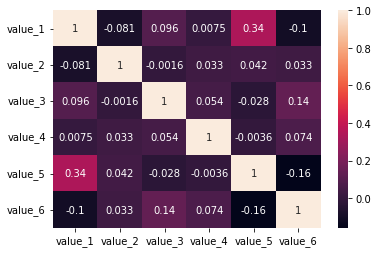

In [29]:
cols = df_1.columns[[2,3,4,5,6,7]]
sns.heatmap(df_1[cols].corr(method = 'spearman'), annot=True)
plt.show()

# 3.2 데이터 분석 (탈모)

In [16]:
li_6 = ["라벨_탈모_0", "라벨_탈모_1", "라벨_탈모_2", "라벨_탈모_3"]

In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_탈모_0
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]탈모_0.양호.zip'

/content/drive/MyDrive/Project4/Dataset/라벨_탈모_0


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_탈모_1
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]탈모_1.경증.zip'

/content/drive/MyDrive/Project4/Dataset/라벨_탈모_1


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_탈모_2
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]탈모_2.중등도.zip'

/content/drive/MyDrive/Project4/Dataset/라벨_탈모_2


In [ ]:
%cd /content/drive/MyDrive/Project4/Dataset/라벨_탈모_3
!unzip -qq '/content/drive/MyDrive/Project4/Dataset/[라벨]탈모_3.중증.zip'

/content/drive/MyDrive/Project4/Dataset/라벨_탈모_3


In [17]:
df_6 = openJson(li_6)

/content/drive/MyDrive/Project4/Dataset/라벨_탈모_0/
152
/content/drive/MyDrive/Project4/Dataset/라벨_탈모_1/
3813
/content/drive/MyDrive/Project4/Dataset/라벨_탈모_2/
1084
/content/drive/MyDrive/Project4/Dataset/라벨_탈모_3/
239


In [18]:
df_6

,image_id,image_file_name,value_1,value_2,value_3,value_4,value_5,value_6
0,8896_A2LEBJJDE001807_1606455960324_3,8896_A2LEBJJDE001807_1606455960324_3_TH.jpg,0,0,0,0,0,0
1,8781_A2LEBJJDE000906_539482042_3,8781_A2LEBJJDE000906_539482042_3_TH.jpg,0,0,0,0,0,0
2,8814_A2LEBJJDE00118S_1603072051977_4,8814_A2LEBJJDE00118S_1603072051977_4_LH.jpg,0,0,0,0,0,0
3,9414_A2LEBJJDE00033L_1605521474634_6,9414_A2LEBJJDE00033L_1605521474634_6_BH.jpg,0,0,0,0,0,0
4,7297_A2LEBJJDE00151I_1606701309614_4,7297_A2LEBJJDE00151I_1606701309614_4_LH.jpg,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5279,1981_A2LEBJJDE001493_1606634009469_5,1981_A2LEBJJDE001493_1606634009469_5_RH.jpg,2,0,2,0,0,3
5280,0715_A2LEBJJDE00175D_1608812596197_3,0715_A2LEBJJDE00175D_1608812596197_3_TH.jpg,0,2,1,0,0,3
5281,4370_A1LCAIHDH00005Q_1607837222616_5,4370_A1LCAIHDH00005Q_1607837222616_5_RH.jpg,1,0,0,0,0,3
5282,4970_A1LCAIHDH00010K_1608355030996_5,4970_A1LCAIHDH00010K_1608355030996_5_RH.jpg,0,1,0,0,0,3


## 3.2.1 시각화

In [19]:
# 그래프 x축 정렬을 위해 int 타입으로 변환
df_6 = df_6.astype({'value_1':'int','value_2':'int', 'value_3':'int', 'value_4':'int', 'value_5':'int', 'value_6':'int'})

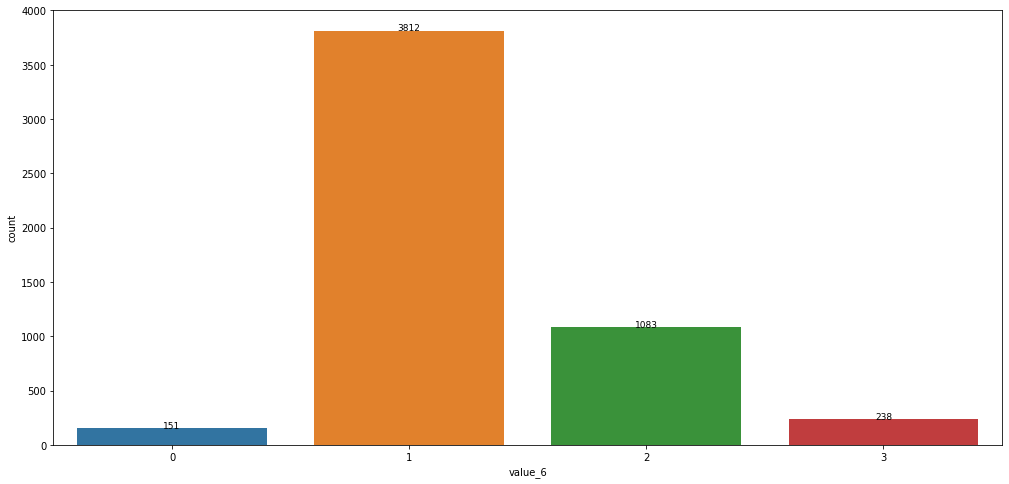

In [20]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_6', data=df_6)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

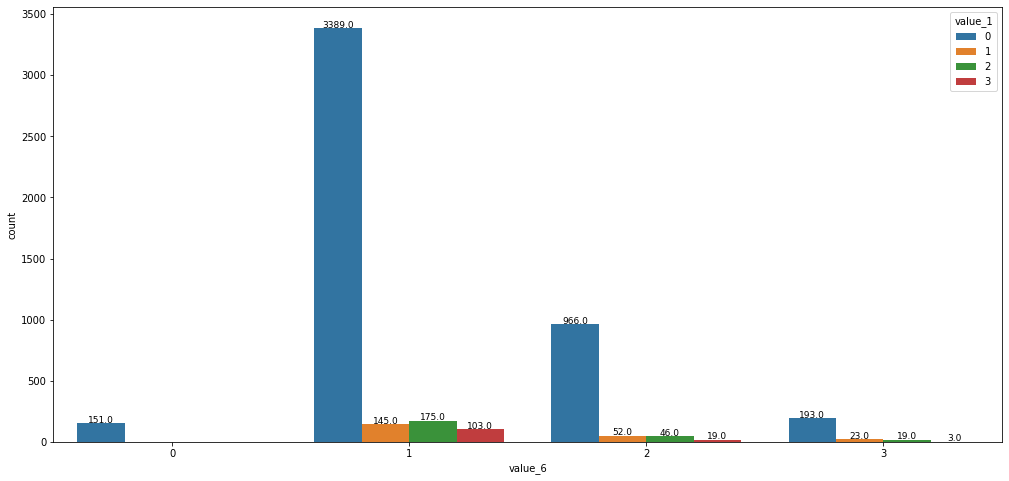

In [21]:
# 미세각질
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_6', data=df_6.sort_values(by = 'value_1'), hue='value_1')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

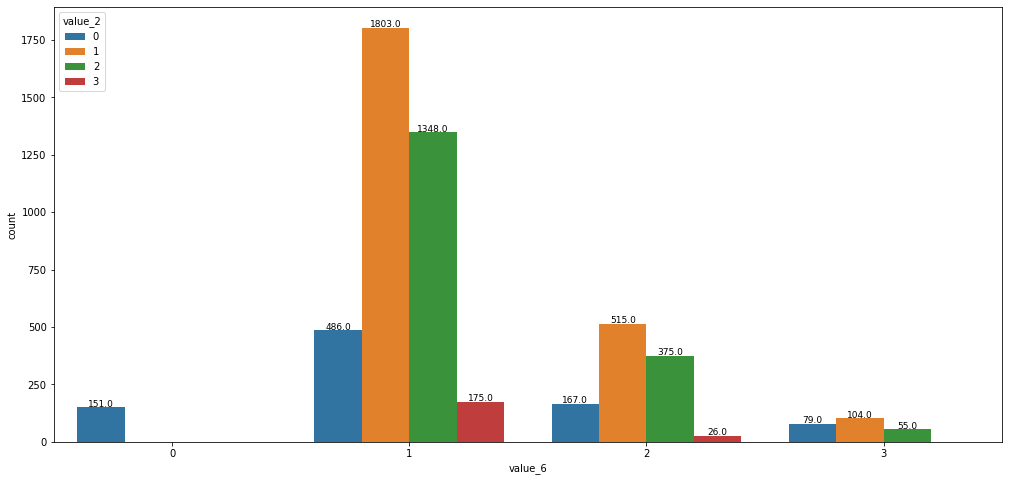

In [22]:
# 피지과다
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_6', data=df_6.sort_values(by = 'value_2'), hue='value_2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

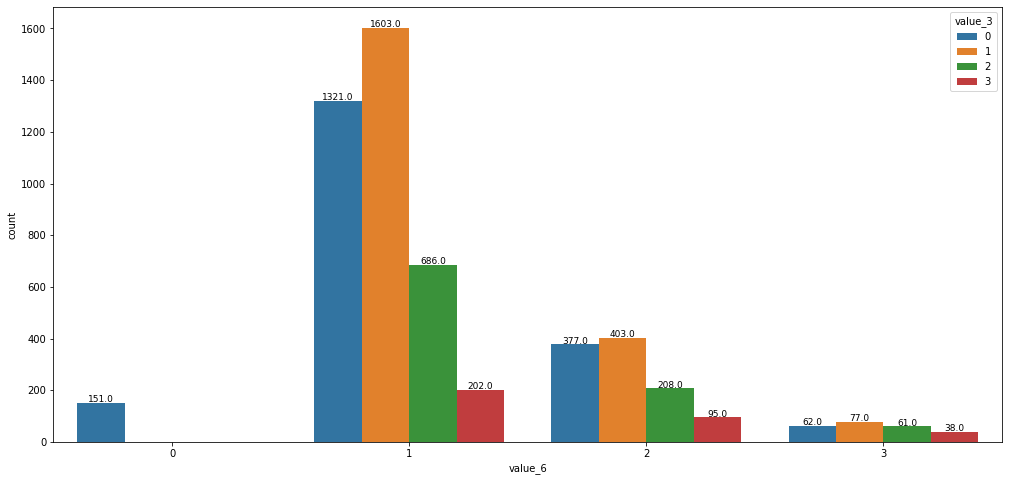

In [23]:
# 모낭사이홍반
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_6', data=df_6.sort_values(by = 'value_3'), hue='value_3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

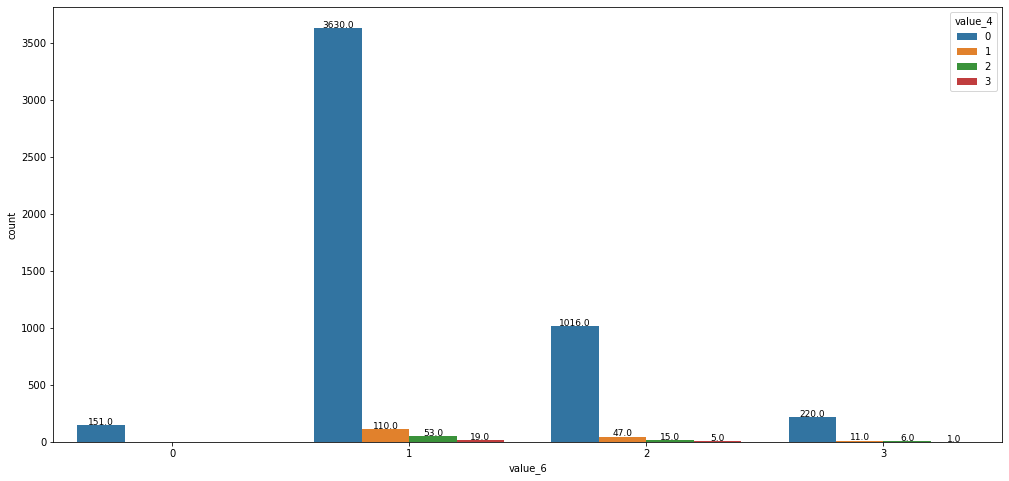

In [24]:
# 모낭홍반/농포
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_6', data=df_6.sort_values(by = 'value_4'), hue='value_4')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

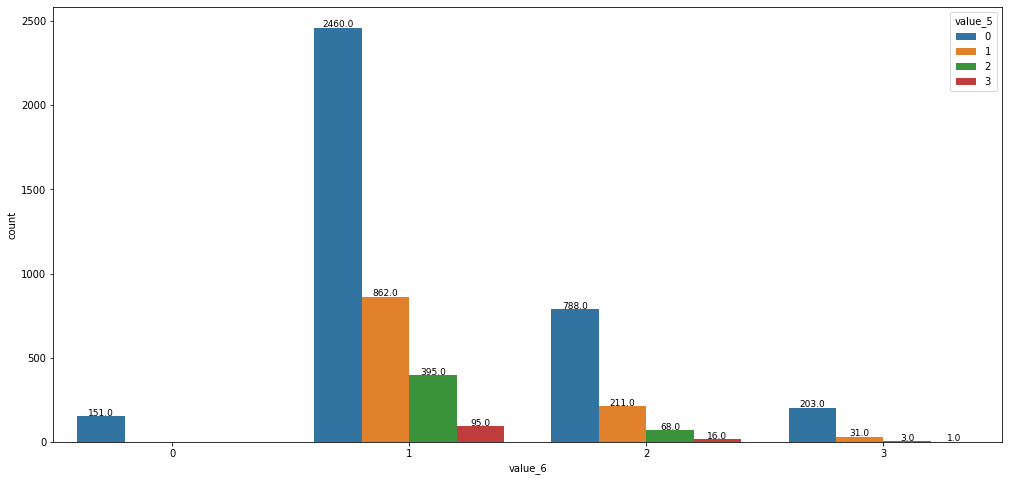

In [25]:
# 비듬
plt.figure(figsize=(17,8))
ax = sns.countplot(x='value_6', data=df_6.sort_values(by = 'value_5'), hue='value_5')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()

count polt을 확인해본 결과,

- value 1, 4 (미세각질, 모낭홍반/농포)는 탈모 강도가 증가하여도 눈에 띄게 강도 0 값이 많은 것을 확인하였다.
- ***가설 1: 탈모와 미세각질/모낭홍반/농포는 동반되는 경우가 드물다.***
- value 2, 3 (피지과다, 모낭사이홍반)은 탈모 강도가 증가함에 따라 증상이 있는 경우가 확연히 많았다.
- ***가설 2: 탈모, 피지과다, 모낭사이홍반 증상은 함께 동반되는 경우가 많다.***


***탈모***
- 모발이 있어야 할 부위에 없거나 연모화가 빠르게 진행되는 것이 특징이다.
- 유전, 호르몬, 환경 등 복합적인 영향이 원인이다.
- 환경적인 탈모의 경우 가려움을 동반하기도 하고 비듬과 피지분비량이 증가한다고 한다.
- 유전적인 탈모의 경우 특별한 이상이 관찰되지 않으며, 밀도가 급격히 낮아지는 것이 특징이다.

***미세각질***
- 두피표면의 천연보습인자(NMF) 부족과 피지선 기능이 저하되어 조기 박리증 증상을 보인다.
- 잔 각질이 관찰되며 모공 주변으로 나이테 모양의 각질층을 형성한다.
- 유수분의 부족으로 당김현상이나 가려움증을 호소한다.

***모낭홍반/농포***
- 두피가 붉은 색을 띠며 표면에 홍반이 확인되는 경우가 있다.
- 세균감염으로 인한 염증이 있다.

***피지과다***
- 피지분비 과다로 두피 표면이 번들거리고 두피색은 탁하다.
- 모공에 물이 고여있는 것처럼 관찰되며 모발밀도가 낮다.
- 심한 경우 피지산화 및 세균으로 인한 악취, 떡비듬, 지루성염증을 동반하기도 한다.

***모낭사이홍반***
- 두피에 모세혈관 확장으로 인하여 홍반이나 출혈이 보인다.
- 태양열이나 에어컨바람과 같은 약한 자극에도 두피가 쉽게 붉어지고 통증이 있을 수 있다.

**탈모 증상의 고객에게 제품을 추천한다면?**
- 지성 두피용 (유수분 부족 해결)
- 약한 자극에도 통증이 있기 때문에 민감성 제품 추천
- 두피 염증은 크게 고려하지 않아도 된다.



## 3.2.2 상관관계 분석

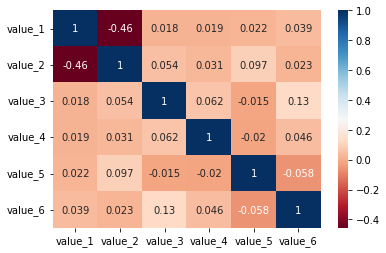

In [26]:
cols = df_6.columns[[2,3,4,5,6,7]]
sns.heatmap(df_6[cols].corr(method = 'spearman'), annot=True, cmap="RdBu")
plt.show()